### **Data Reading and Preparing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import boxplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Complaints.csv')
df.head(3)

,CASE_ID,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,ESCALATED_GROUP,OPEN_DATE,OPEN_USER,CLOSE_DATE,...,AGE_BRACKET,ACTUAL_COMPLAINT,CALLBACK_MECHANISM,RESOLUTION,RESOLUTION_DESCRIPTION,CASE_DESC,OPEN_GR,COMPLAINT_TYPE,PRODUCT,CASE
0,CAS-1060890-L3D6Q6,FTTH Home,CBU,FTTH Home,Resolved,Yes,F&I_BO,19.06.2022 06:07,DANA,21.06.2022 13:41,...,2.0,Actual Complaint,Phone,NaN,NaN,NaN,CBU / EBU - personal view,Technical,Internet,Technical complaint
1,CAS-388567-W4B9Q3,NaN,CBU,NaN,Resolved,Yes,Mobile_BO,04.04.2022 14:11,TCRMService,05.04.2022 12:13,...,1.0,Not Actual Complaint,Phone,NaN,NaN,NaN,System Administrator,Commercial,Mobile,Commercial claim
2,CAS-1494939-L9F0X7,Bitstream Home,CBU,Wanadoo-ADSL-Res,Resolved,No,NaN,03.08.2022 03:20,MOUTAZ,03.08.2022 03:20,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint


In [ ]:
df.shape

(10415, 22)

In [ ]:
#to view all the informations regarding each column like the data type of the column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10415 entries, 0 to 10414
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CASE_ID                 10415 non-null  object 
 1   OFFER_NAME              9122 non-null   object 
 2   CUSTOMER_TYPE           10415 non-null  object 
 3   CUSTOMER_GROUP          9067 non-null   object 
 4   CURRENT_STATUS          10415 non-null  object 
 5   ESCALATION_FLAG         10415 non-null  object 
 6   ESCALATED_GROUP         3360 non-null   object 
 7   OPEN_DATE               10415 non-null  object 
 8   OPEN_USER               10053 non-null  object 
 9   CLOSE_DATE              10296 non-null  object 
 10  CLOSE_GROUP             5525 non-null   object 
 11  CLOSE_USER              9899 non-null   object 
 12  AGE_BRACKET             10296 non-null  float64
 13  ACTUAL_COMPLAINT        10415 non-null  object 
 14  CALLBACK_MECHANISM      3138 non-null 

In [ ]:
df.isnull().sum()

CASE_ID                       0
OFFER_NAME                 1293
CUSTOMER_TYPE                 0
CUSTOMER_GROUP             1348
CURRENT_STATUS                0
ESCALATION_FLAG               0
ESCALATED_GROUP            7055
OPEN_DATE                     0
OPEN_USER                   362
CLOSE_DATE                  119
CLOSE_GROUP                4890
CLOSE_USER                  516
AGE_BRACKET                 119
ACTUAL_COMPLAINT              0
CALLBACK_MECHANISM         7277
RESOLUTION                10336
RESOLUTION_DESCRIPTION    10376
CASE_DESC                  9243
OPEN_GR                    4561
COMPLAINT_TYPE                0
PRODUCT                       0
CASE                          0
dtype: int64

## **Drop Columns & Duplicates**

In [ ]:
df=df.drop(columns=['RESOLUTION','RESOLUTION_DESCRIPTION','CASE_DESC','CASE_ID'],axis=1)
df.head(3)

,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,ESCALATED_GROUP,OPEN_DATE,OPEN_USER,CLOSE_DATE,CLOSE_GROUP,CLOSE_USER,AGE_BRACKET,ACTUAL_COMPLAINT,CALLBACK_MECHANISM,OPEN_GR,COMPLAINT_TYPE,PRODUCT,CASE
0,FTTH Home,CBU,FTTH Home,Resolved,Yes,F&I_BO,19.06.2022 06:07,DANA,21.06.2022 13:41,F&I_BO,DANA,2.0,Actual Complaint,Phone,CBU / EBU - personal view,Technical,Internet,Technical complaint
1,NaN,CBU,NaN,Resolved,Yes,Mobile_BO,04.04.2022 14:11,TCRMService,05.04.2022 12:13,Mobile_BO,ENNAS,1.0,Not Actual Complaint,Phone,System Administrator,Commercial,Mobile,Commercial claim
2,Bitstream Home,CBU,Wanadoo-ADSL-Res,Resolved,No,NaN,03.08.2022 03:20,MOUTAZ,03.08.2022 03:20,CYC_COMMERCAIL_TEAM,MOUTAZ,1.0,User Not Filled,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint


In [ ]:
df=df.drop_duplicates()
df.head(3)

,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,ESCALATED_GROUP,OPEN_DATE,OPEN_USER,CLOSE_DATE,CLOSE_GROUP,CLOSE_USER,AGE_BRACKET,ACTUAL_COMPLAINT,CALLBACK_MECHANISM,OPEN_GR,COMPLAINT_TYPE,PRODUCT,CASE
0,FTTH Home,CBU,FTTH Home,Resolved,Yes,F&I_BO,19.06.2022 06:07,DANA,21.06.2022 13:41,F&I_BO,DANA,2.0,Actual Complaint,Phone,CBU / EBU - personal view,Technical,Internet,Technical complaint
1,NaN,CBU,NaN,Resolved,Yes,Mobile_BO,04.04.2022 14:11,TCRMService,05.04.2022 12:13,Mobile_BO,ENNAS,1.0,Not Actual Complaint,Phone,System Administrator,Commercial,Mobile,Commercial claim
2,Bitstream Home,CBU,Wanadoo-ADSL-Res,Resolved,No,NaN,03.08.2022 03:20,MOUTAZ,03.08.2022 03:20,CYC_COMMERCAIL_TEAM,MOUTAZ,1.0,User Not Filled,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint


In [ ]:
df.isnull().sum()

OFFER_NAME            1290
CUSTOMER_TYPE            0
CUSTOMER_GROUP        1345
CURRENT_STATUS           0
ESCALATION_FLAG          0
ESCALATED_GROUP       7047
OPEN_DATE                0
OPEN_USER              362
CLOSE_DATE             119
CLOSE_GROUP           4887
CLOSE_USER             516
AGE_BRACKET            119
ACTUAL_COMPLAINT         0
CALLBACK_MECHANISM    7269
OPEN_GR               4558
COMPLAINT_TYPE           0
PRODUCT                  0
CASE                     0
dtype: int64

## **Data Cleaning & Processing**

In [ ]:
#identify categorical variables of offer_name and the product
cat_columns = ['PRODUCT','OFFER_NAME']
cat_columns

['PRODUCT', 'OFFER_NAME']

In [ ]:
#convert all categorical variables to numeric
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df[cat_columns] = df[cat_columns].apply(LabelEncoder().fit_transform)
df.head(3)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,ESCALATED_GROUP,OPEN_DATE,OPEN_USER,CLOSE_DATE,CLOSE_GROUP,CLOSE_USER,AGE_BRACKET,ACTUAL_COMPLAINT,CALLBACK_MECHANISM,OPEN_GR,COMPLAINT_TYPE,PRODUCT,CASE
0,24,CBU,FTTH Home,Resolved,Yes,F&I_BO,19.06.2022 06:07,DANA,21.06.2022 13:41,F&I_BO,DANA,2.0,Actual Complaint,Phone,CBU / EBU - personal view,Technical,0,Technical complaint
1,140,CBU,NaN,Resolved,Yes,Mobile_BO,04.04.2022 14:11,TCRMService,05.04.2022 12:13,Mobile_BO,ENNAS,1.0,Not Actual Complaint,Phone,System Administrator,Commercial,1,Commercial claim
2,9,CBU,Wanadoo-ADSL-Res,Resolved,No,NaN,03.08.2022 03:20,MOUTAZ,03.08.2022 03:20,CYC_COMMERCAIL_TEAM,MOUTAZ,1.0,User Not Filled,NaN,CBU - CC 1st Layer A,Technical,0,Technical complaint


In [ ]:
df['OFFER_NAME'] = df['OFFER_NAME'].fillna(df.groupby('PRODUCT')['OFFER_NAME'].agg(pd.Series.mode))

<ipython-input-219-058eb0ccaa3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OFFER_NAME'] = df['OFFER_NAME'].fillna(df.groupby('PRODUCT')['OFFER_NAME'].agg(pd.Series.mode))


In [ ]:
df.isnull().sum()

OFFER_NAME               0
CUSTOMER_TYPE            0
CUSTOMER_GROUP        1345
CURRENT_STATUS           0
ESCALATION_FLAG          0
ESCALATED_GROUP       7047
OPEN_DATE                0
OPEN_USER              362
CLOSE_DATE             119
CLOSE_GROUP           4887
CLOSE_USER             516
AGE_BRACKET            119
ACTUAL_COMPLAINT         0
CALLBACK_MECHANISM    7269
OPEN_GR               4558
COMPLAINT_TYPE           0
PRODUCT                  0
CASE                     0
dtype: int64

In [ ]:
df['CUSTOMER_GROUP'].unique()

array(['FTTH Home', nan, 'Wanadoo-ADSL-Res', 'Prepaid', 'FTTB Corporate',
       'IP Test', 'Premium Family internet', 'Government Precorp',
       'OL campaigns', 'Residential', 'PM Governorate',
       'Fiber 2 years commitment FTTH', 'Family Mobile-IEW',
       'resigned Emp and family FTTH', 'Internet everywhere IEW',
       'FTTB Pro', 'Emp and Family FTTH', 'MobileCom Test Lines',
       'Family GOV mobile', 'SME Post-Hybrid GOV', 'SME Post-Hybrid',
       'Family loyalty Mobile', 'Family GOV internet',
       'PreCorp Customers', 'Pro Convergent Internet', 'Internet SME',
       'Fiber Loyalty', 'Family FTTH', 'Fiber 1 year commitment FTTH',
       'Family Internet', 'Royal Court', 'ADSL one year commitment',
       'KA-HYPRID', 'Elite+ FTTH', 'Emp and family ADSL',
       'Naitel customers FTTH', 'Elite+ Mobile', 'Army PM Mobile',
       'Premium  Mobile', 'Corporate Large Account',
       'GOV.. ADSL Enterprise', 'Family Loyalty Internet', 'ALPHA',
       'PRO ADSL', 'Family F

In [ ]:
#identify categorical variables in customer_group and customer_type
cat_columns = ['CUSTOMER_GROUP','CUSTOMER_TYPE']
cat_columns

['CUSTOMER_GROUP', 'CUSTOMER_TYPE']

In [ ]:
#convert all categorical variables to numeric
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df[cat_columns] = df[cat_columns].apply(LabelEncoder().fit_transform)
df.head(3)

,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,ESCALATED_GROUP,OPEN_DATE,OPEN_USER,CLOSE_DATE,CLOSE_GROUP,CLOSE_USER,AGE_BRACKET,ACTUAL_COMPLAINT,CALLBACK_MECHANISM,OPEN_GR,COMPLAINT_TYPE,PRODUCT,CASE
0,24,0,16,Resolved,Yes,F&I_BO,19.06.2022 06:07,DANA,21.06.2022 13:41,F&I_BO,DANA,2.0,Actual Complaint,Phone,CBU / EBU - personal view,Technical,0,Technical complaint
1,140,0,73,Resolved,Yes,Mobile_BO,04.04.2022 14:11,TCRMService,05.04.2022 12:13,Mobile_BO,ENNAS,1.0,Not Actual Complaint,Phone,System Administrator,Commercial,1,Commercial claim
2,9,0,70,Resolved,No,NaN,03.08.2022 03:20,MOUTAZ,03.08.2022 03:20,CYC_COMMERCAIL_TEAM,MOUTAZ,1.0,User Not Filled,NaN,CBU - CC 1st Layer A,Technical,0,Technical complaint


In [ ]:
df['CUSTOMER_GROUP'] = df['CUSTOMER_GROUP'].fillna(df.groupby('CUSTOMER_TYPE')['CUSTOMER_GROUP'].agg(pd.Series.mode))

In [ ]:
#to show the mode value in the ESCALATED_GROUP column
df['ESCALATED_GROUP'].mode()

0    Mobile_BO
dtype: object

In [ ]:
df['ESCALATED_GROUP']=np.where(df['ESCALATION_FLAG']=='No','No GROUP',df['ESCALATED_GROUP'])

In [ ]:
df.isnull().sum()

OFFER_NAME               0
CUSTOMER_TYPE            0
CUSTOMER_GROUP           0
CURRENT_STATUS           0
ESCALATION_FLAG          0
ESCALATED_GROUP         42
OPEN_DATE                0
OPEN_USER              362
CLOSE_DATE             119
CLOSE_GROUP           4887
CLOSE_USER             516
AGE_BRACKET            119
ACTUAL_COMPLAINT         0
CALLBACK_MECHANISM    7269
OPEN_GR               4558
COMPLAINT_TYPE           0
PRODUCT                  0
CASE                     0
dtype: int64

In [ ]:
df['ESCALATED_GROUP']=np.where(df['ESCALATION_FLAG']=='No','No GROUP',"Mobile_BO")

In [ ]:
df.isnull().sum()

OFFER_NAME               0
CUSTOMER_TYPE            0
CUSTOMER_GROUP           0
CURRENT_STATUS           0
ESCALATION_FLAG          0
ESCALATED_GROUP          0
OPEN_DATE                0
OPEN_USER              362
CLOSE_DATE             119
CLOSE_GROUP           4887
CLOSE_USER             516
AGE_BRACKET            119
ACTUAL_COMPLAINT         0
CALLBACK_MECHANISM    7269
OPEN_GR               4558
COMPLAINT_TYPE           0
PRODUCT                  0
CASE                     0
dtype: int64

In [ ]:
df['CLOSE_USER']=np.where(df['ESCALATION_FLAG']=='No',df['OPEN_USER'],df['CLOSE_USER'])

In [ ]:
df.isnull().sum()

OFFER_NAME               0
CUSTOMER_TYPE            0
CUSTOMER_GROUP           0
CURRENT_STATUS           0
ESCALATION_FLAG          0
ESCALATED_GROUP          0
OPEN_DATE                0
OPEN_USER              362
CLOSE_DATE             119
CLOSE_GROUP           4887
CLOSE_USER             447
AGE_BRACKET            119
ACTUAL_COMPLAINT         0
CALLBACK_MECHANISM    7269
OPEN_GR               4558
COMPLAINT_TYPE           0
PRODUCT                  0
CASE                     0
dtype: int64

In [ ]:
df['CLOSE_USER']=np.where(df['OPEN_USER'],df['OPEN_USER'],df['CLOSE_USER'])

In [ ]:
df.isnull().sum()

OFFER_NAME               0
CUSTOMER_TYPE            0
CUSTOMER_GROUP           0
CURRENT_STATUS           0
ESCALATION_FLAG          0
ESCALATED_GROUP          0
OPEN_DATE                0
OPEN_USER              362
CLOSE_DATE             119
CLOSE_GROUP           4887
CLOSE_USER             362
AGE_BRACKET            119
ACTUAL_COMPLAINT         0
CALLBACK_MECHANISM    7269
OPEN_GR               4558
COMPLAINT_TYPE           0
PRODUCT                  0
CASE                     0
dtype: int64

In [ ]:
df['OPEN_USER'].fillna('No User',inplace=True)

In [ ]:
df['CLOSE_USER'].fillna('No User',inplace=True)

In [ ]:
df.isnull().sum()

OFFER_NAME               0
CUSTOMER_TYPE            0
CUSTOMER_GROUP           0
CURRENT_STATUS           0
ESCALATION_FLAG          0
ESCALATED_GROUP          0
OPEN_DATE                0
OPEN_USER                0
CLOSE_DATE             119
CLOSE_GROUP           4887
CLOSE_USER               0
AGE_BRACKET            119
ACTUAL_COMPLAINT         0
CALLBACK_MECHANISM    7269
OPEN_GR               4558
COMPLAINT_TYPE           0
PRODUCT                  0
CASE                     0
dtype: int64

In [ ]:
df['CLOSE_DATE']=np.where(df['CURRENT_STATUS']=='Active','No Date',df['CLOSE_DATE'])

In [ ]:
df['AGE_BRACKET'].fillna(-1,inplace=True)

In [ ]:
df.isnull().sum()

OFFER_NAME               0
CUSTOMER_TYPE            0
CUSTOMER_GROUP           0
CURRENT_STATUS           0
ESCALATION_FLAG          0
ESCALATED_GROUP          0
OPEN_DATE                0
OPEN_USER                0
CLOSE_DATE               0
CLOSE_GROUP           4887
CLOSE_USER               0
AGE_BRACKET              0
ACTUAL_COMPLAINT         0
CALLBACK_MECHANISM    7269
OPEN_GR               4558
COMPLAINT_TYPE           0
PRODUCT                  0
CASE                     0
dtype: int64

In [ ]:
df['CLOSE_GROUP']=np.where(df['ESCALATION_FLAG']=='No','No Escalation',df["ESCALATED_GROUP"])

In [ ]:
df.isnull().sum()

OFFER_NAME               0
CUSTOMER_TYPE            0
CUSTOMER_GROUP           0
CURRENT_STATUS           0
ESCALATION_FLAG          0
ESCALATED_GROUP          0
OPEN_DATE                0
OPEN_USER                0
CLOSE_DATE               0
CLOSE_GROUP              0
CLOSE_USER               0
AGE_BRACKET              0
ACTUAL_COMPLAINT         0
CALLBACK_MECHANISM    7269
OPEN_GR               4558
COMPLAINT_TYPE           0
PRODUCT                  0
CASE                     0
dtype: int64

In [ ]:
df['OPEN_GR'].fillna('No Open Group ',inplace=True)

In [ ]:
df.isnull().sum()

OFFER_NAME               0
CUSTOMER_TYPE            0
CUSTOMER_GROUP           0
CURRENT_STATUS           0
ESCALATION_FLAG          0
ESCALATED_GROUP          0
OPEN_DATE                0
OPEN_USER                0
CLOSE_DATE               0
CLOSE_GROUP              0
CLOSE_USER               0
AGE_BRACKET              0
ACTUAL_COMPLAINT         0
CALLBACK_MECHANISM    7269
OPEN_GR                  0
COMPLAINT_TYPE           0
PRODUCT                  0
CASE                     0
dtype: int64

In [ ]:
df['CALLBACK_MECHANISM'].mode()

0    SMS
dtype: object

In [ ]:
df['CALLBACK_MECHANISM']=np.where(df['AGE_BRACKET']==1,'Phone','SMS')

In [ ]:
df.isnull().sum()

OFFER_NAME            0
CUSTOMER_TYPE         0
CUSTOMER_GROUP        0
CURRENT_STATUS        0
ESCALATION_FLAG       0
ESCALATED_GROUP       0
OPEN_DATE             0
OPEN_USER             0
CLOSE_DATE            0
CLOSE_GROUP           0
CLOSE_USER            0
AGE_BRACKET           0
ACTUAL_COMPLAINT      0
CALLBACK_MECHANISM    0
OPEN_GR               0
COMPLAINT_TYPE        0
PRODUCT               0
CASE                  0
dtype: int64

In [ ]:
df.head(3)

,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,ESCALATED_GROUP,OPEN_DATE,OPEN_USER,CLOSE_DATE,CLOSE_GROUP,CLOSE_USER,AGE_BRACKET,ACTUAL_COMPLAINT,CALLBACK_MECHANISM,OPEN_GR,COMPLAINT_TYPE,PRODUCT,CASE
0,24,0,16,Resolved,Yes,Mobile_BO,19.06.2022 06:07,DANA,21.06.2022 13:41,Mobile_BO,DANA,2.0,Actual Complaint,SMS,CBU / EBU - personal view,Technical,0,Technical complaint
1,140,0,73,Resolved,Yes,Mobile_BO,04.04.2022 14:11,TCRMService,05.04.2022 12:13,Mobile_BO,TCRMService,1.0,Not Actual Complaint,Phone,System Administrator,Commercial,1,Commercial claim
2,9,0,70,Resolved,No,No GROUP,03.08.2022 03:20,MOUTAZ,03.08.2022 03:20,No Escalation,MOUTAZ,1.0,User Not Filled,Phone,CBU - CC 1st Layer A,Technical,0,Technical complaint


In [ ]:
df.isnull().sum()

OFFER_NAME            0
CUSTOMER_TYPE         0
CUSTOMER_GROUP        0
CURRENT_STATUS        0
ESCALATION_FLAG       0
ESCALATED_GROUP       0
OPEN_DATE             0
OPEN_USER             0
CLOSE_DATE            0
CLOSE_GROUP           0
CLOSE_USER            0
AGE_BRACKET           0
ACTUAL_COMPLAINT      0
CALLBACK_MECHANISM    0
OPEN_GR               0
COMPLAINT_TYPE        0
PRODUCT               0
CASE                  0
dtype: int64

## **Modeling**

In [ ]:
cat_columns = df.select_dtypes(['object']).columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df[cat_columns] = df[cat_columns].apply(LabelEncoder().fit_transform)
df.head(3)

,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,ESCALATED_GROUP,OPEN_DATE,OPEN_USER,CLOSE_DATE,CLOSE_GROUP,CLOSE_USER,AGE_BRACKET,ACTUAL_COMPLAINT,CALLBACK_MECHANISM,OPEN_GR,COMPLAINT_TYPE,PRODUCT,CASE
0,24,0,16,1,1,0,5650,55,6284,0,55,2.0,0,1,10,1,0,4
1,140,0,73,1,1,0,965,250,1314,0,250,1.0,1,0,18,0,1,0
2,9,0,70,1,0,1,867,166,852,1,166,1.0,2,0,2,1,0,4


In [ ]:
# storing the input values in the X variable
X = df.drop(["PRODUCT"], axis=1)

# storing all the ouputs in y variable
y = df["PRODUCT"]

In [ ]:
acc_KNN=[]
re_KNN=[]
pre_KNN=[]
f1_score_KNN=[]
for i in range(30):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=i)

  classifer = KNeighborsClassifier(n_neighbors=3 )
  classifer.fit(X_train,y_train)
  y_pred= classifer.predict(X_test)

  accuranc_KNN = accuracy_score(y_test,y_pred)
  acc_KNN.append(accuranc_KNN)

  recall_KNN = recall_score(y_test,y_pred)
  re_KNN.append(recall_KNN)

  Precision_KNN =  precision_score(y_test,y_pred)
  pre_KNN.append(Precision_KNN)

  f1_KNN = f1_score(y_test,y_pred)
  f1_score_KNN.append(f1_KNN)


Average_Accuracy_KNN = sum(acc_KNN) / float(len(acc_KNN))
Average_Recall_KNN = sum(re_KNN) / float(len(re_KNN))
Average_Precision_KNN = sum(pre_KNN) / float(len(pre_KNN))
Average_F1_score_KNN = sum(f1_score_KNN) / float(len(f1_score_KNN))
print('Average_Accuracy = ', Average_Accuracy_KNN)
print('Average_Recall = ', Average_Recall_KNN)
print('Average_Precision = ', Average_Precision_KNN)
print('Average_F1_score = ', Average_F1_score_KNN)
print('=========================================================')

Average_Accuracy =  0.8476854076565752
Average_Recall =  0.6624060235942927
Average_Precision =  0.7970455786916459
Average_F1_score =  0.7233520089151884


In [ ]:
acc_DTC=[]
re_DTC=[]
pre_DTC=[]
f1_score_DTC=[]
for i in range(30):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=i)

  classifer2 = DecisionTreeClassifier()
  classifer2 = classifer2.fit(X_train,y_train)
  y_pred = classifer2.predict(X_test)

  accuranc_DTC = accuracy_score(y_test,y_pred)
  acc_DTC.append(accuranc_DTC)

  recall_DTC = recall_score(y_test,y_pred)
  re_DTC.append(recall_DTC)
  
  Precision_DTC =  precision_score(y_test,y_pred) 
  pre_DTC.append(Precision_DTC) 

  f1_DTC = f1_score(y_test,y_pred)
  f1_score_DTC.append(f1_DTC)

 
Average_Accuracy_DTC = sum(acc_DTC) / float(len(acc_DTC))
Average_Recall_DTC = sum(re_DTC) / float(len(re_DTC))
Average_Precision_DTC = sum(pre_DTC) / float(len(pre_DTC))
Average_F1_score_DTC = sum(f1_score_DTC) / float(len(f1_score_DTC))
print('Average_Accuracy = ', Average_Accuracy_DTC)
print('Average_Recall = ', Average_Recall_DTC)
print('Average_Precision = ', Average_Precision_DTC)
print('Average_F1_score = ', Average_F1_score_DTC)
print('=========================================================')

Average_Accuracy =  0.9710876181323082
Average_Recall =  0.9518364328314101
Average_Precision =  0.9520967926797792
Average_F1_score =  0.9519087589053596


In [ ]:
acc_NB=[]
re_NB=[]
pre_NB=[]
f1_score_NB=[]
for i in range(30):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=i)
  
  classifer3 = GaussianNB()
  classifer3 = classifer3.fit(X_train,y_train)
  y_pred = classifer3.predict(X_test)
  
  accuranc_NB = accuracy_score(y_test,y_pred)
  acc_NB.append(accuranc_NB)

  recall_NB = recall_score(y_test,y_pred)
  re_NB.append(recall_NB)

  Precision_NB =  precision_score(y_test,y_pred)
  pre_NB.append(Precision_NB)

  f1_NB = f1_score(y_test,y_pred)
  f1_score_NB.append(f1_NB)

Average_Accuracy_NB = sum(acc_NB) / float(len(acc_NB))
Average_Recall_NB = sum(re_NB) / float(len(re_NB))
Average_Precision_NB = sum(pre_NB) / float(len(pre_NB))
Average_F1_score_NB = sum(f1_score_NB) / float(len(f1_score_NB))
print('Average_Accuracy = ', Average_Accuracy_NB)
print('Average_Recall = ', Average_Recall_NB)
print('Average_Precision = ', Average_Precision_NB)
print('Average_F1_score = ', Average_F1_score_NB)
print('=========================================================')

Average_Accuracy =  0.8323722569277592
Average_Recall =  0.8001863721734102
Average_Precision =  0.6911597540870886
Average_F1_score =  0.7415406773971055


## **Visualization**

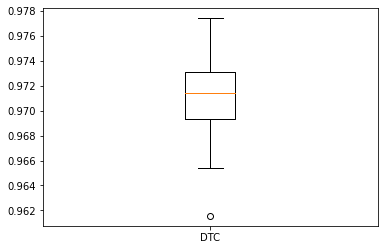

In [ ]:
my_dict = {'DTC': acc_DTC}

fig, ax = plt.subplots()

ax.boxplot(my_dict.values())

ax.set_xticklabels(my_dict.keys())

plt.show()

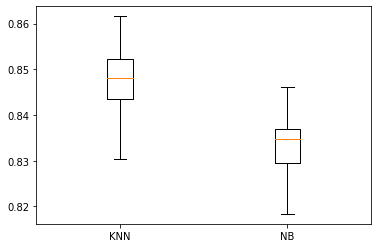

In [ ]:
my_dict = {'KNN': acc_KNN, 'NB': acc_NB}

fig, ax = plt.subplots()

ax.boxplot(my_dict.values())

ax.set_xticklabels(my_dict.keys())

plt.show()

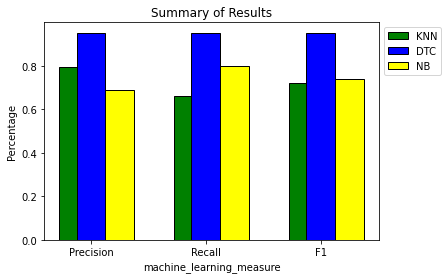

In [ ]:
machine_learning_measure = ['Precision','Recall','F1']

machine_learning_model_KNN=[Average_Precision_KNN,Average_Recall_KNN,Average_F1_score_KNN]
machine_learning_model_DTC=[Average_Precision_DTC,Average_Recall_DTC,Average_F1_score_DTC]
machine_learning_model_NB=[Average_Precision_NB,Average_Recall_NB,Average_F1_score_NB]

X_axis = np.arange(len(machine_learning_measure )) 

plt.bar(X_axis + 0.1, machine_learning_model_KNN, color ='green',width = 0.25,edgecolor = 'black',label = 'KNN')
plt.bar(X_axis + 0.25, machine_learning_model_DTC, color ='blue',width = 0.25,edgecolor = 'black',label = 'DTC')
plt.bar(X_axis + 0.50, machine_learning_model_NB, color ='yellow',width = 0.25,edgecolor = 'black',label = 'NB')
plt.xticks(X_axis+0.25, machine_learning_measure)

plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("machine_learning_measure")
plt.ylabel("Percentage")
plt.title("Summary of Results")
plt.show()

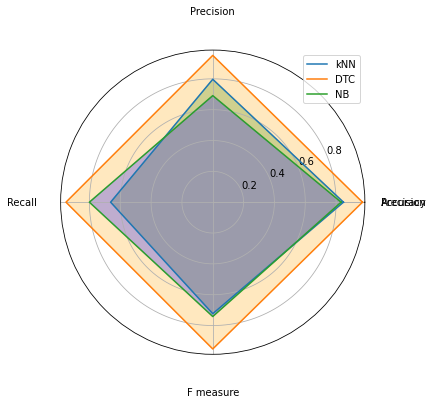

In [ ]:
ML_measure=['Accuracy','Precision','Recall','F measure']

ML_model_KNN=[Average_Accuracy_KNN,Average_Precision_KNN,Average_Recall_KNN,Average_F1_score_KNN]
ML_model_DTC=[Average_Accuracy_DTC,Average_Precision_DTC,Average_Recall_DTC,Average_F1_score_DTC]
ML_model_NB=[Average_Accuracy_NB,Average_Precision_NB,Average_Recall_NB,Average_F1_score_NB]

angles=np.linspace(0,2*np.pi,len(ML_measure), endpoint=False)

angles=np.concatenate((angles,[angles[0]]))

ML_measure.append(machine_learning_measure[0])
ML_model_KNN.append(ML_model_KNN[0])
ML_model_DTC.append(ML_model_DTC[0])
ML_model_NB.append(ML_model_NB[0])

ML_measure.append(ML_measure[0])



plt.figure(figsize=(6,6))
ax = plt.subplot( polar=True)

plt.plot(angles,ML_model_KNN, label='kNN')
plt.fill(angles, ML_model_KNN, alpha=0.25, color='g')


plt.plot(angles,ML_model_DTC, label='DTC')
plt.fill(angles, ML_model_DTC, alpha=0.25, color='orange')


plt.plot(angles,ML_model_NB, label='NB')
plt.fill(angles, ML_model_NB, alpha=0.25, color='blue')

ax.set_thetagrids(angles * 180/np.pi, ML_measure)
XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS[-1::-1]:
  tick.set_pad(28)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()